#### Import basic liabraries

In [71]:
# import data science basic liabrary
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import filtering for unwanted warnings
import warnings
warnings.filterwarnings('ignore')

#### Load datasets

In [72]:
# import breast cancer dataset from sklearn
from sklearn.datasets import load_breast_cancer
# load data
cancer = load_breast_cancer()
# create dataframe from the data
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
# target column
df['target'] = pd.Series(cancer.target)
# target_name column
df['target_names'] = pd.Series(cancer.target_names)

In [102]:
df.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst perimeter  worst area  worst smoothness  \
0                 0.07871  ...           184.60      2019.0            0.1622   
1                 0.05667  ...           158.80      1956.0            0.1238   
2                 0.05999  ...           152.50      1709.0            0.1444   
3                 0.09744  ...            98.87       567.7            0.2098   
4                 0.05883  ...           152.20      1575.0            0.1374   

   worst compactness  worst concavity  worst concave points  worst symmetry  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   worst fractal dimension  target  target_names  
0                  0.11890       0     malignant  
1                  0.08902       0        benign  
2                  0.08758       0           NaN  
3                  0.17300       0           NaN  
4                  0.07678       0           NaN  

[5 rows x 32 columns]

#### Exploratory data analysis

In [63]:
# data shape
df.shape

(569, 32)

In [64]:
# Columns names
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target', 'target_names'],
      dtype='object')

In [69]:
# print data types
df.dtypes

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

In [67]:
# data statistical summary
df.describe()

mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       mean symmetry  mean fractal dimension  ...  worst texture  \
count     569.000000              569.000000  ...     569.000000   
mean        0.181162                0.062798  ...      25.677223   
std         0.027414                0.007060  ...       6.146258   
min         0.106000                0.049960  ...      12.020000   
25%         0.161900                0.057700  ...      21.080000   
50%         0.179200                0.061540  ...      25.410000   
75%         0.195700                0.066120  ...      29.720000   
max         0.304000                0.097440  ...      49.540000   

       worst perimeter   worst area  worst smoothness  worst compactness  \
count       569.000000   569.000000        569.000000         569.000000   
mean        107.261213   880.583128          0.132369           0.254265   
std          33.602542   569.356993          0.022832           0.157336   
min          50.410000   185.200000          0.071170           0.027290   
25%          84.110000   515.300000          0.116600           0.147200   
50%          97.660000   686.500000          0.131300           0.211900   
75%         125.400000  1084.000000          0.146000           0.339100   
max         251.200000  4254.000000          0.222600           1.058000   

       worst concavity  worst concave points  worst symmetry  \
count       569.000000            569.000000      569.000000   
mean          0.272188              0.114606        0.290076   
std           0.208624              0.065732        0.061867   
min           0.000000              0.000000        0.156500   
25%           0.114500              0.064930        0.250400   
50%           0.226700              0.099930        0.282200   
75%           0.382900              0.161400        0.317900   
max           1.252000              0.291000        0.663800   

       worst fractal dimension      target  
count               569.000000  569.000000  
mean                  0.083946    0.627417  
std                   0.018061    0.483918  
min                   0.055040    0.000000  
25%                   0.071460    0.000000  
50%                   0.080040    1.000000  
75%                   0.092080    1.000000  
max                   0.207500    1.000000  

[8 rows x 31 columns]

In [65]:
# show data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [68]:
# Columns unique values
df.nunique()

mean radius                456
mean texture               479
mean perimeter             522
mean area                  539
mean smoothness            474
mean compactness           537
mean concavity             537
mean concave points        542
mean symmetry              432
mean fractal dimension     499
radius error               540
texture error              519
perimeter error            533
area error                 528
smoothness error           547
compactness error          541
concavity error            533
concave points error       507
symmetry error             498
fractal dimension error    545
worst radius               457
worst texture              511
worst perimeter            514
worst area                 544
worst smoothness           411
worst compactness          529
worst concavity            539
worst concave points       492
worst symmetry             500
worst fractal dimension    535
target                       2
target_names                 2
dtype: i

In [73]:
# count missing values in decending order
df.isnull().sum().sort_values(ascending=False)

target_names               567
mean texture                 0
target                       0
worst fractal dimension      0
worst symmetry               0
worst concave points         0
worst concavity              0
worst compactness            0
worst smoothness             0
worst area                   0
worst perimeter              0
worst texture                0
worst radius                 0
fractal dimension error      0
symmetry error               0
concave points error         0
mean radius                  0
compactness error            0
smoothness error             0
area error                   0
perimeter error              0
texture error                0
radius error                 0
mean fractal dimension       0
mean symmetry                0
mean concave points          0
mean concavity               0
mean compactness             0
mean smoothness              0
mean area                    0
mean perimeter               0
concavity error              0
dtype: i

In [74]:
# count target names
df['target_names'].value_counts()

malignant    1
benign       1
Name: target_names, dtype: int64

In [75]:
# target_names replace acording to target
df['target_names'] = df['target'].replace({0: 'malignant', 1: 'benign'})

In [76]:
# count target names
df['target_names'].value_counts()

benign       357
malignant    212
Name: target_names, dtype: int64

In [77]:
# count target names
df['target'].value_counts()

1    357
0    212
Name: target, dtype: int64

In [78]:
# Separete malignant and benign from target
Malingnant=df[df['target'] == 0]
Benign=df[df['target'] == 1]

In [80]:
# Shape of malignant and benign
print(Benign.shape)
print(Malingnant.shape)


(357, 32)
(212, 32)


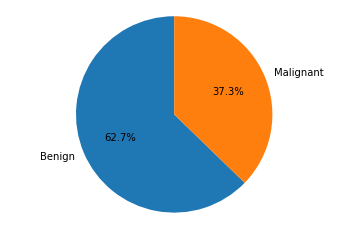

In [86]:
# pie chart for malignant and benign
plt.pie([len(Benign),len(Malingnant)], labels=['Benign', 'Malignant'],
        autopct='%1.1f%%', shadow=False, startangle=90)
plt.axis('equal')
plt.show()

In [88]:
# pearson correlation with mean area
df.corr()['mean area'][df.corr()['mean area']>0.5].sort_values(ascending=False)

mean area               1.000000
mean radius             0.987357
mean perimeter          0.986507
worst radius            0.962746
worst area              0.959213
worst perimeter         0.959120
mean concave points     0.823269
area error              0.800086
radius error            0.732562
perimeter error         0.726628
worst concave points    0.722017
mean concavity          0.685983
worst concavity         0.512606
Name: mean area, dtype: float64

In [87]:
#Spearman's correlation mean redius 
df.corr(method='spearman')['mean radius'][df.corr(method='spearman')['mean radius']>0.5].sort_values(ascending=False)

mean radius             1.000000
mean area               0.999602
mean perimeter          0.997802
worst area              0.978863
worst radius            0.978604
worst perimeter         0.971555
mean concave points     0.759702
area error              0.738077
worst concave points    0.727265
mean concavity          0.645728
worst concavity         0.596043
perimeter error         0.565520
radius error            0.550247
Name: mean radius, dtype: float64

#### Visualization

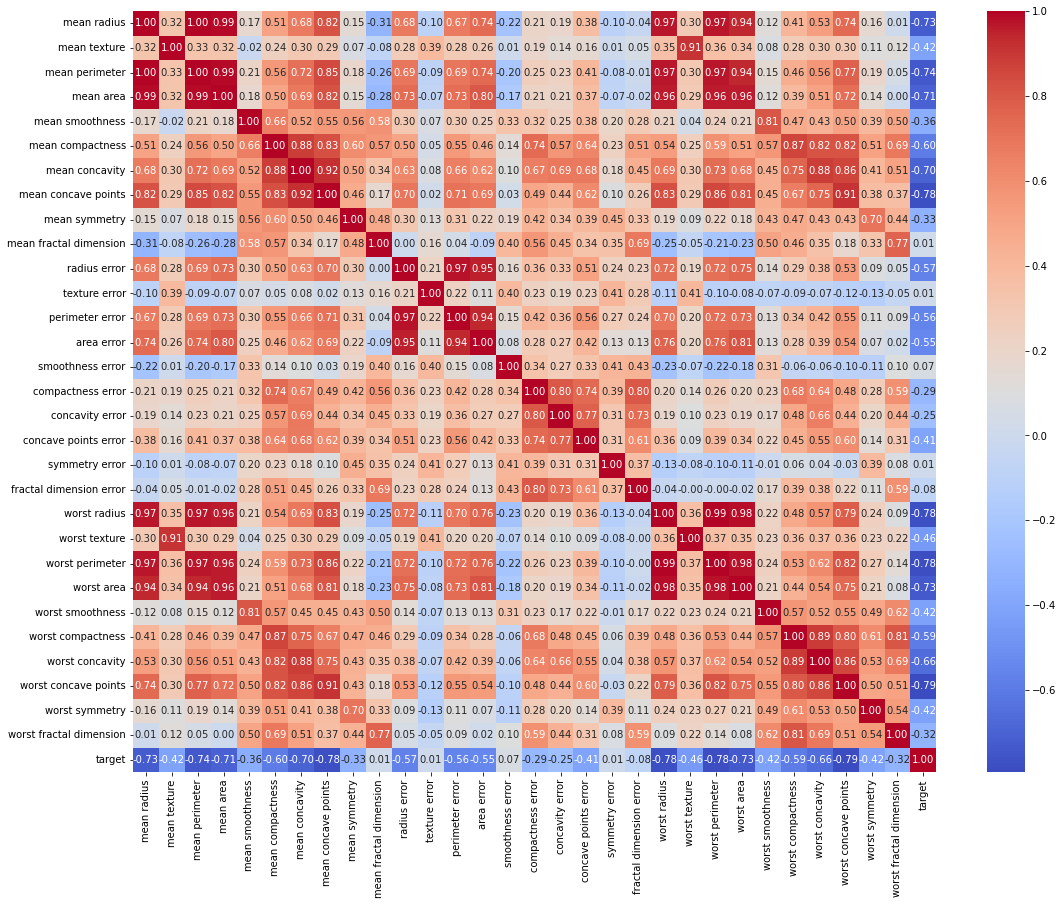

In [41]:
# correaltion heatmap 
plt.figure(figsize=(18,14))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, fmt='.2f')
plt.show()

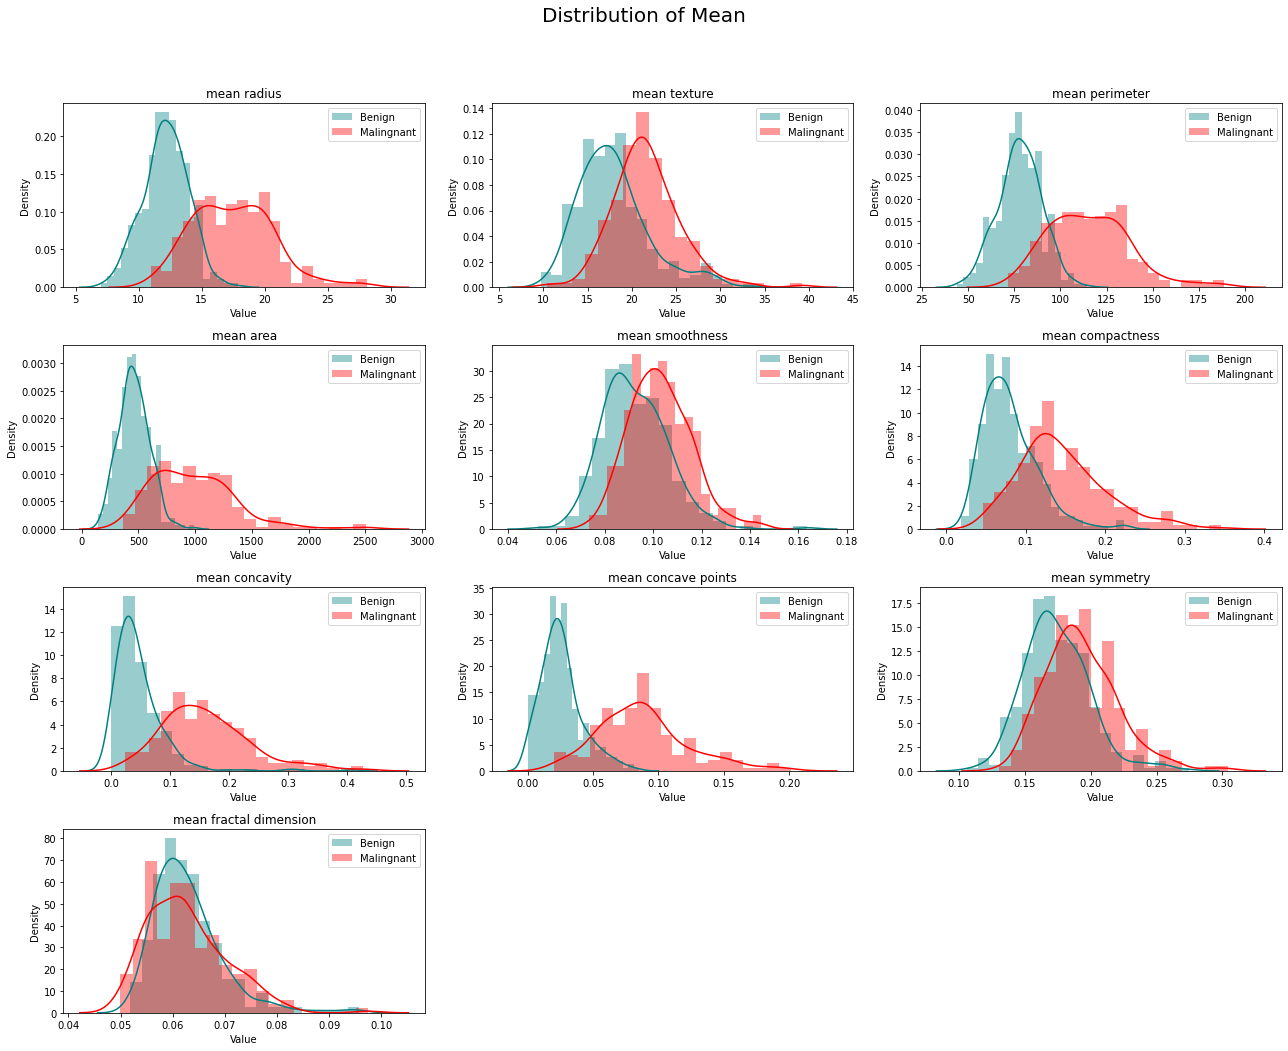

In [43]:
# distribution of all mean columns with malingnant and benign
fig = plt.figure(figsize = (18,14),tight_layout=True)
# Enumerate starting at 0 to 10, add 1 for subplotting
for i,b in enumerate(list(df.columns[0:10])):
    i = i + 1
    ax = fig.add_subplot(4,3,i)
    sns.distplot(df[b][df['target'] == 1],label = 'Benign', color = 'teal', bins = 20,hist = True )
    sns.distplot(df[b][df['target'] == 0],label = 'Malingnant', color = "r", bins = 20,hist = True)
    ax.set_xlabel('Value')    
    ax.set_title(b)
    plt.legend()
plt.suptitle('Distribution of Mean', y=1.04, size=20)
plt.tight_layout()
plt.show()

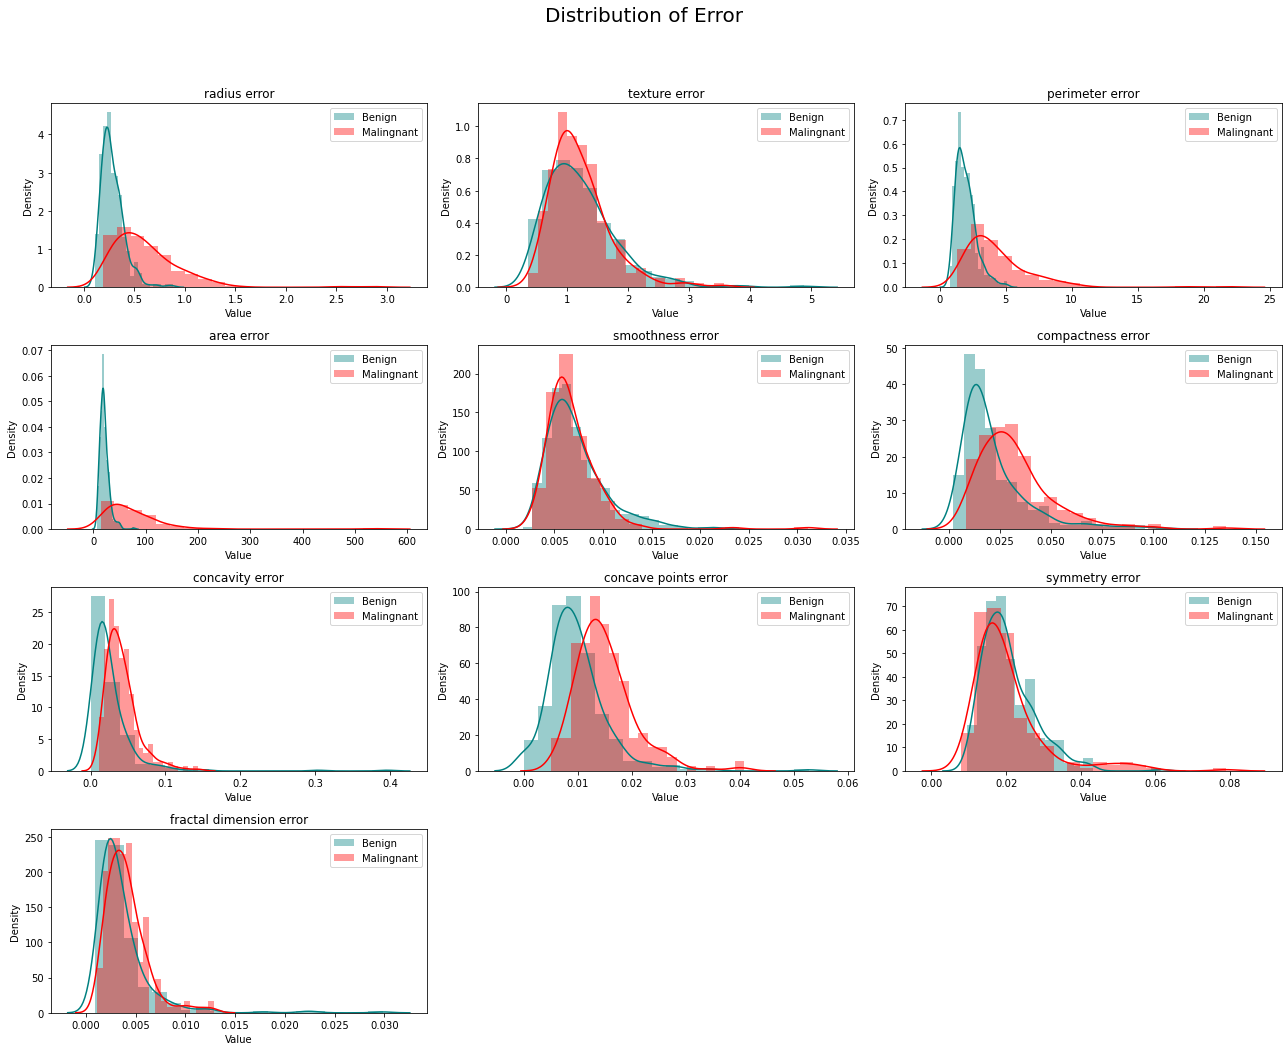

In [44]:
# distribution of all error columns with malingnant and benign
fig = plt.figure(figsize = (18,14),tight_layout=True)
# Enumerate starting at 10 to 20, add 1 for subplotting
for i,b in enumerate(list(df.columns[10:20])):
    i = i + 1
    ax = fig.add_subplot(4,3,i)
    sns.distplot(df[b][df['target'] == 1],label = 'Benign', color = 'teal', bins = 20,hist = True )
    sns.distplot(df[b][df['target'] == 0],label = 'Malingnant', color = "r", bins = 20,hist = True)
    ax.set_xlabel('Value')    
    ax.set_title(b)
    plt.legend()
plt.suptitle('Distribution of Error', y=1.04, size=20)
plt.tight_layout()
plt.show()

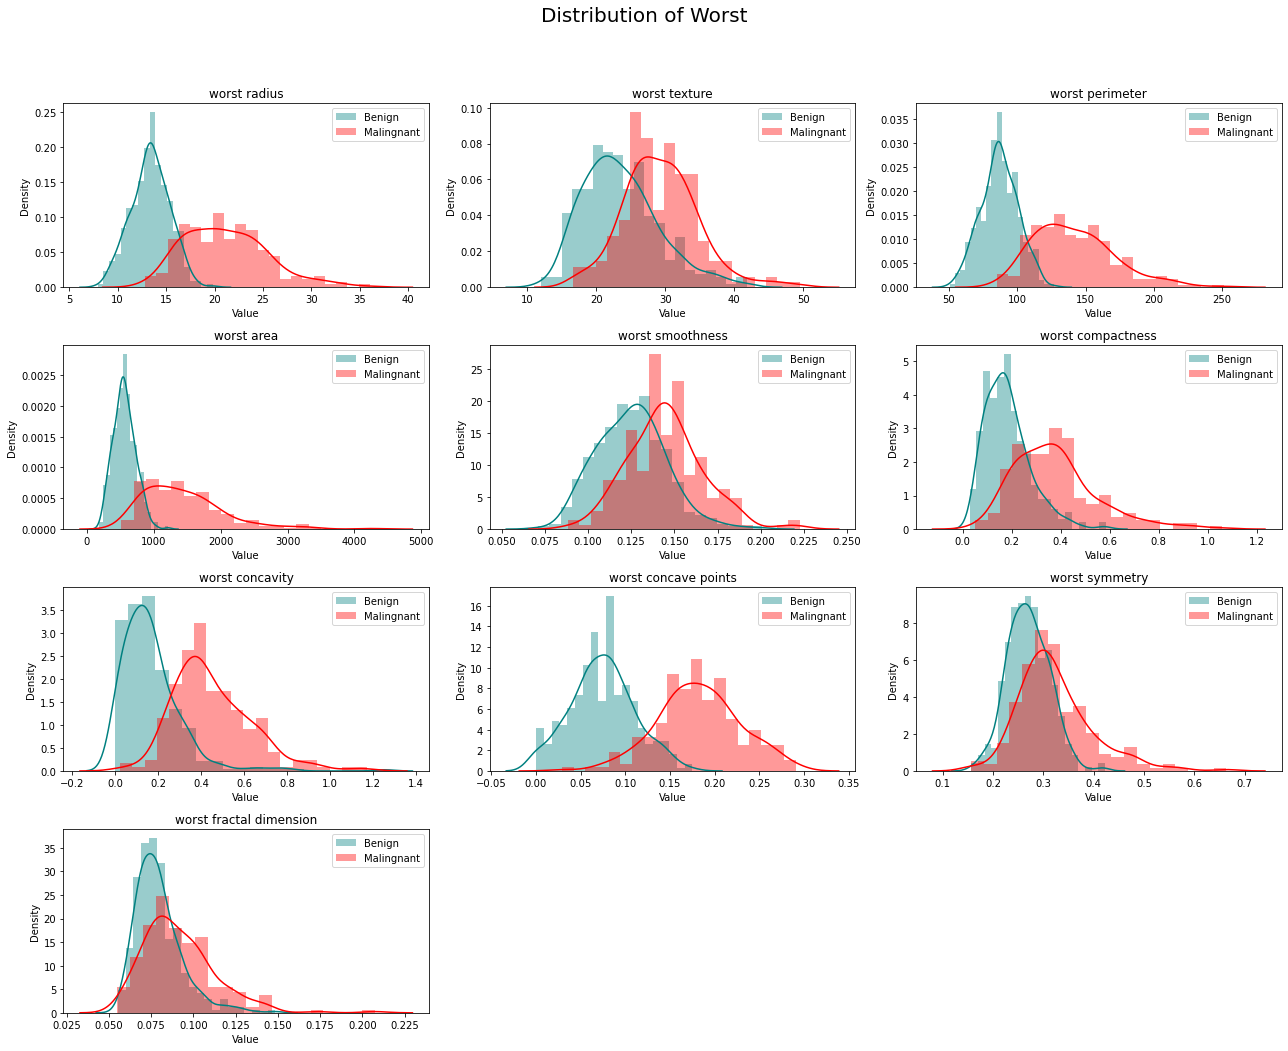

In [58]:
# distribution of all worst columns with malingnant and benign
fig = plt.figure(figsize = (18,14),tight_layout=True)
# Enumerate starting at 0 to 10, add 1 for subplotting
for i,b in enumerate(list(df.columns[20:30])):
    i = i + 1
    ax = fig.add_subplot(4,3,i)
    sns.distplot(df[b][df['target'] == 1],label = 'Benign', color = 'teal', bins = 20,hist = True )
    sns.distplot(df[b][df['target'] == 0],label = 'Malingnant', color = "r", bins = 20,hist = True)
    ax.set_xlabel('Value')    
    ax.set_title(b)
    plt.legend()
plt.suptitle('Distribution of Worst', y=1.04, size=20)
plt.tight_layout()
plt.show()

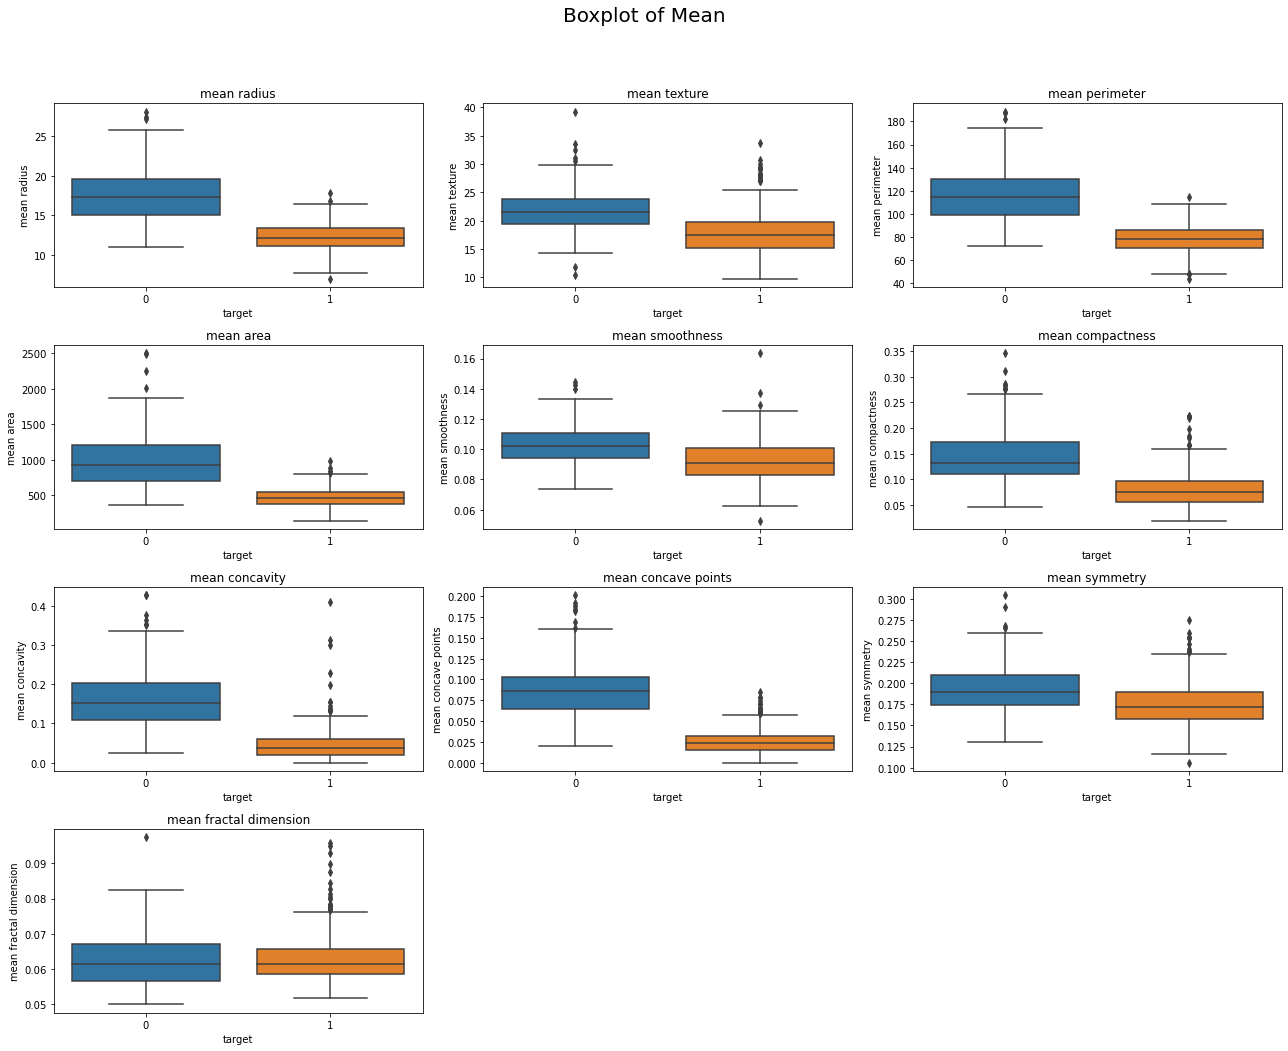

In [46]:
# box plot of all mean columns for cheaking outliers
fig = plt.figure(figsize = (18,14),tight_layout=True)
# Enumerate starting at 0 to 10, add 1 for subplotting
for i,b in enumerate(list(df.columns[0:10])):
    i = i + 1
    ax = fig.add_subplot(4,3,i)
    sns.boxplot(x=df['target'],y=b,data=df)
    ax.set_title(b)
plt.suptitle('Boxplot of Mean', y=1.04, size=20)
plt.tight_layout()
plt.show()

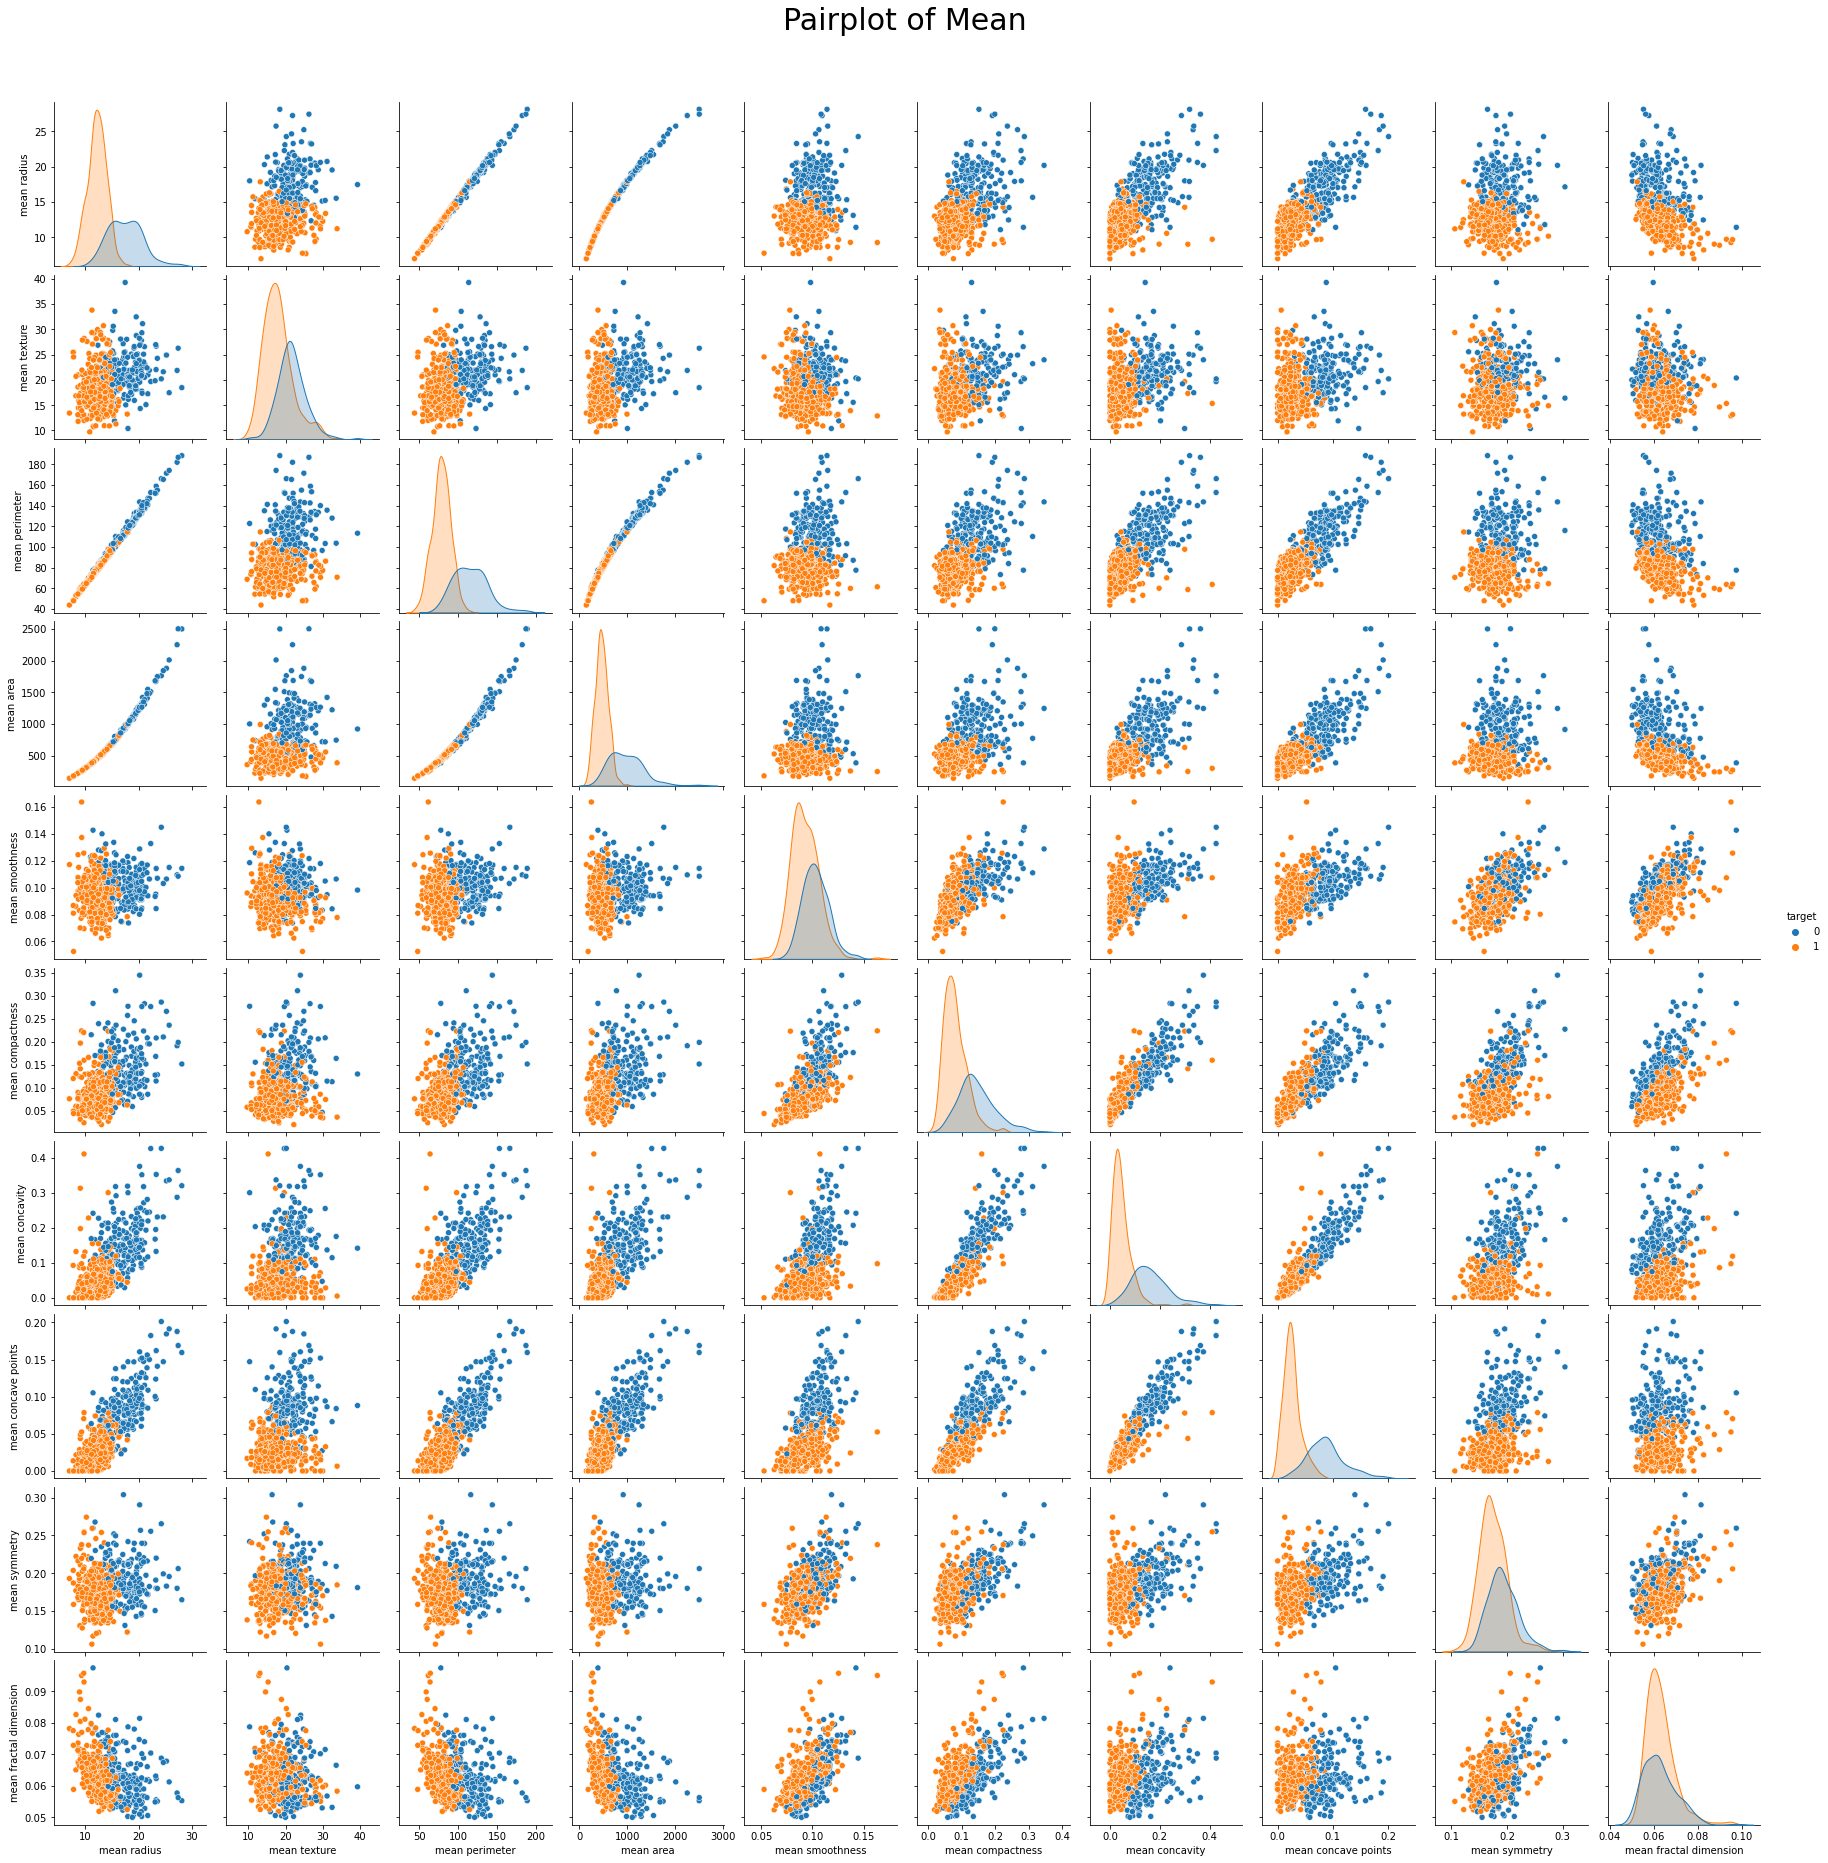

In [62]:
#pairplot only 10 columns with target
sns.pairplot(df, hue='target',vars=list(df.columns[0:10]))
plt.suptitle('Pairplot of Mean', y=1.04, size=30)
plt.show()

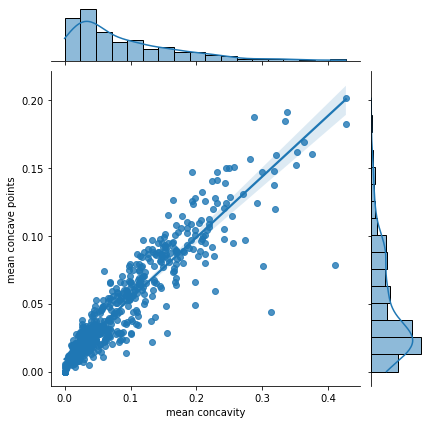

In [47]:
# joint plot 
sns.jointplot(x='mean concavity',y='mean concave points',data=df,kind='reg')
plt.show()

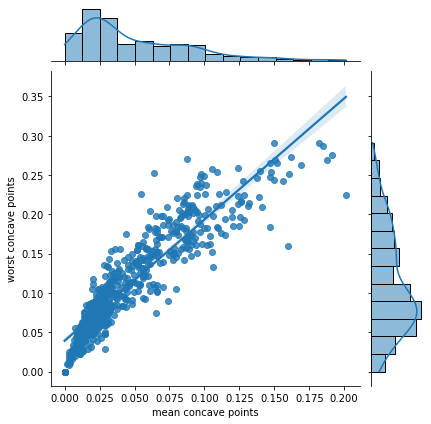

In [56]:
# joint plot 
sns.jointplot(x='mean concave points',y='worst concave points',data=df,kind='reg')
plt.show()

#### Separate feature and target 

In [89]:
# drop target_names column from dataframe & anssign to new variable df1
#df['target_names'] = pd.Series(cancer.target_names)
df1 = df.drop(['target_names'], axis=1)
# drop target column from dataframe
#df['target'] = pd.Series(cancer.target)
X= df1.drop(['target'], axis=1)
# copy target column from dataframe & assign to y      
y= df1["target"].copy() 

In [90]:
df1.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.07871  ...          17.33           184.60      2019.0   
1                 0.05667  ...          23.41           158.80      1956.0   
2                 0.05999  ...          25.53           152.50      1709.0   
3                 0.09744  ...          26.50            98.87       567.7   
4                 0.05883  ...          16.67           152.20      1575.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   worst symmetry  worst fractal dimension  target  
0          0.4601                  0.11890       0  
1          0.2750                  0.08902       0  
2          0.3613                  0.08758       0  
3          0.6638                  0.17300       0  
4          0.2364                  0.07678       0  

[5 rows x 31 columns]

In [91]:
X.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0                 0.07871  ...         25.38          17.33           184.60   
1                 0.05667  ...         24.99          23.41           158.80   
2                 0.05999  ...         23.57          25.53           152.50   
3                 0.09744  ...         14.91          26.50            98.87   
4                 0.05883  ...         22.54          16.67           152.20   

   worst area  worst smoothness  worst compactness  worst concavity  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   worst concave points  worst symmetry  worst fractal dimension  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 30 columns]

In [94]:
y.tail()

564    0
565    0
566    0
567    0
568    1
Name: target, dtype: int32

#### Train Test Spliting

In [4]:
# import train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(398, 30) (398,)
(171, 30) (171,)


#### Parameter Tunning

In [ ]:
# parameter tuning with random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search
param_grid = {
    'n_estimators': [50, 100, 200, 300, 400, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [4, 5, 6, 7, 8],
    'min_samples_leaf': [3, 4, 5, 6, 7],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy'],
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                            cv=5, n_jobs=-1, verbose=2)
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
# best parameter
grid_search.best_params_
# best score
grid_search.best_score_

In [64]:
# XGBoost parameters tuning
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
# create model
model = XGBClassifier()
# create parameter grid
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.3, 0.5],
    'n_estimators': [50, 100, 200, 300, 400, 500],   
}
# create grid search object
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
# fit grid search object to training data
grid_search.fit(X_train, y_train)
# print best parameters
print(grid_search.best_params_)
# print best score
print(grid_search.best_score_)

[01:31:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:31:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:31:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:31:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [27]:
# print best parameters
print(grid_search.best_params_)

{'learning_rate': 0.5, 'max_depth': 5, 'n_estimators': 100}


In [28]:
# print best score
print(grid_search.best_score_)

0.9748417721518987


#### Model,Prediction and Acuracy Score

In [6]:
# Create model random forest
from sklearn.ensemble import RandomForestClassifier
# create model
rf = RandomForestClassifier(n_estimators=100, max_depth=6,criterion='entropy', 
                                min_samples_leaf=3,max_features='sqrt',bootstrap=True)

# fit model
rf.fit(X_train, y_train)
# predict
predictions = rf.predict(X_test)

0.9707602339181286

In [8]:
# train accuracy
print('Random Forest Training accuracy:', rf.score(X_train, y_train))

Random Forest Training accuracy: 0.9949748743718593


In [12]:
# Test accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.9707602339181286

In [13]:
# create model xgboost
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.5)
# fit model
xgb.fit(X_train, y_train)
# predict
predictions2 = xgb.predict(X_test)

[23:51:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [14]:
# train accuracy
print('xgboost Training accuracy:', xgb.score(X_train, y_train))

xgboost Training accuracy: 1.0


In [15]:
# Test accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions2)

0.9824561403508771

#### Ploting Acuracy with ROC curve

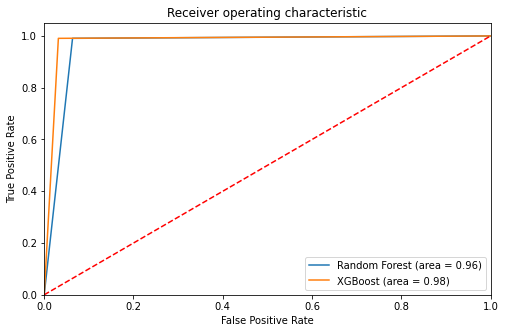

In [25]:
# ploting roc curve for random forest and xgboost acuracy
from sklearn.metrics import roc_curve, auc
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, predictions)
# calculate auc
auc(fpr, tpr)
# calculate roc curve
fpr2, tpr2, thresholds2 = roc_curve(y_test, predictions2)
# calculate auc
auc(fpr2, tpr2)
# plot roc curve
plt.figure(figsize=(8,5))
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % auc(fpr, tpr))
plt.plot(fpr2, tpr2, label='XGBoost (area = %0.2f)' % auc(fpr2, tpr2))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


#### Confusion Matrix

In [113]:
y_test.value_counts()

1    108
0     63
Name: target, dtype: int64

In [114]:
# Random forest confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)
cm

array([[ 60,   3],
       [  2, 106]], dtype=int64)

In [115]:
# xgboost confusion matrix
from sklearn.metrics import confusion_matrix
cm2 = confusion_matrix(y_test, predictions2)
cm2

array([[ 61,   2],
       [  1, 107]], dtype=int64)

#### Tree Map

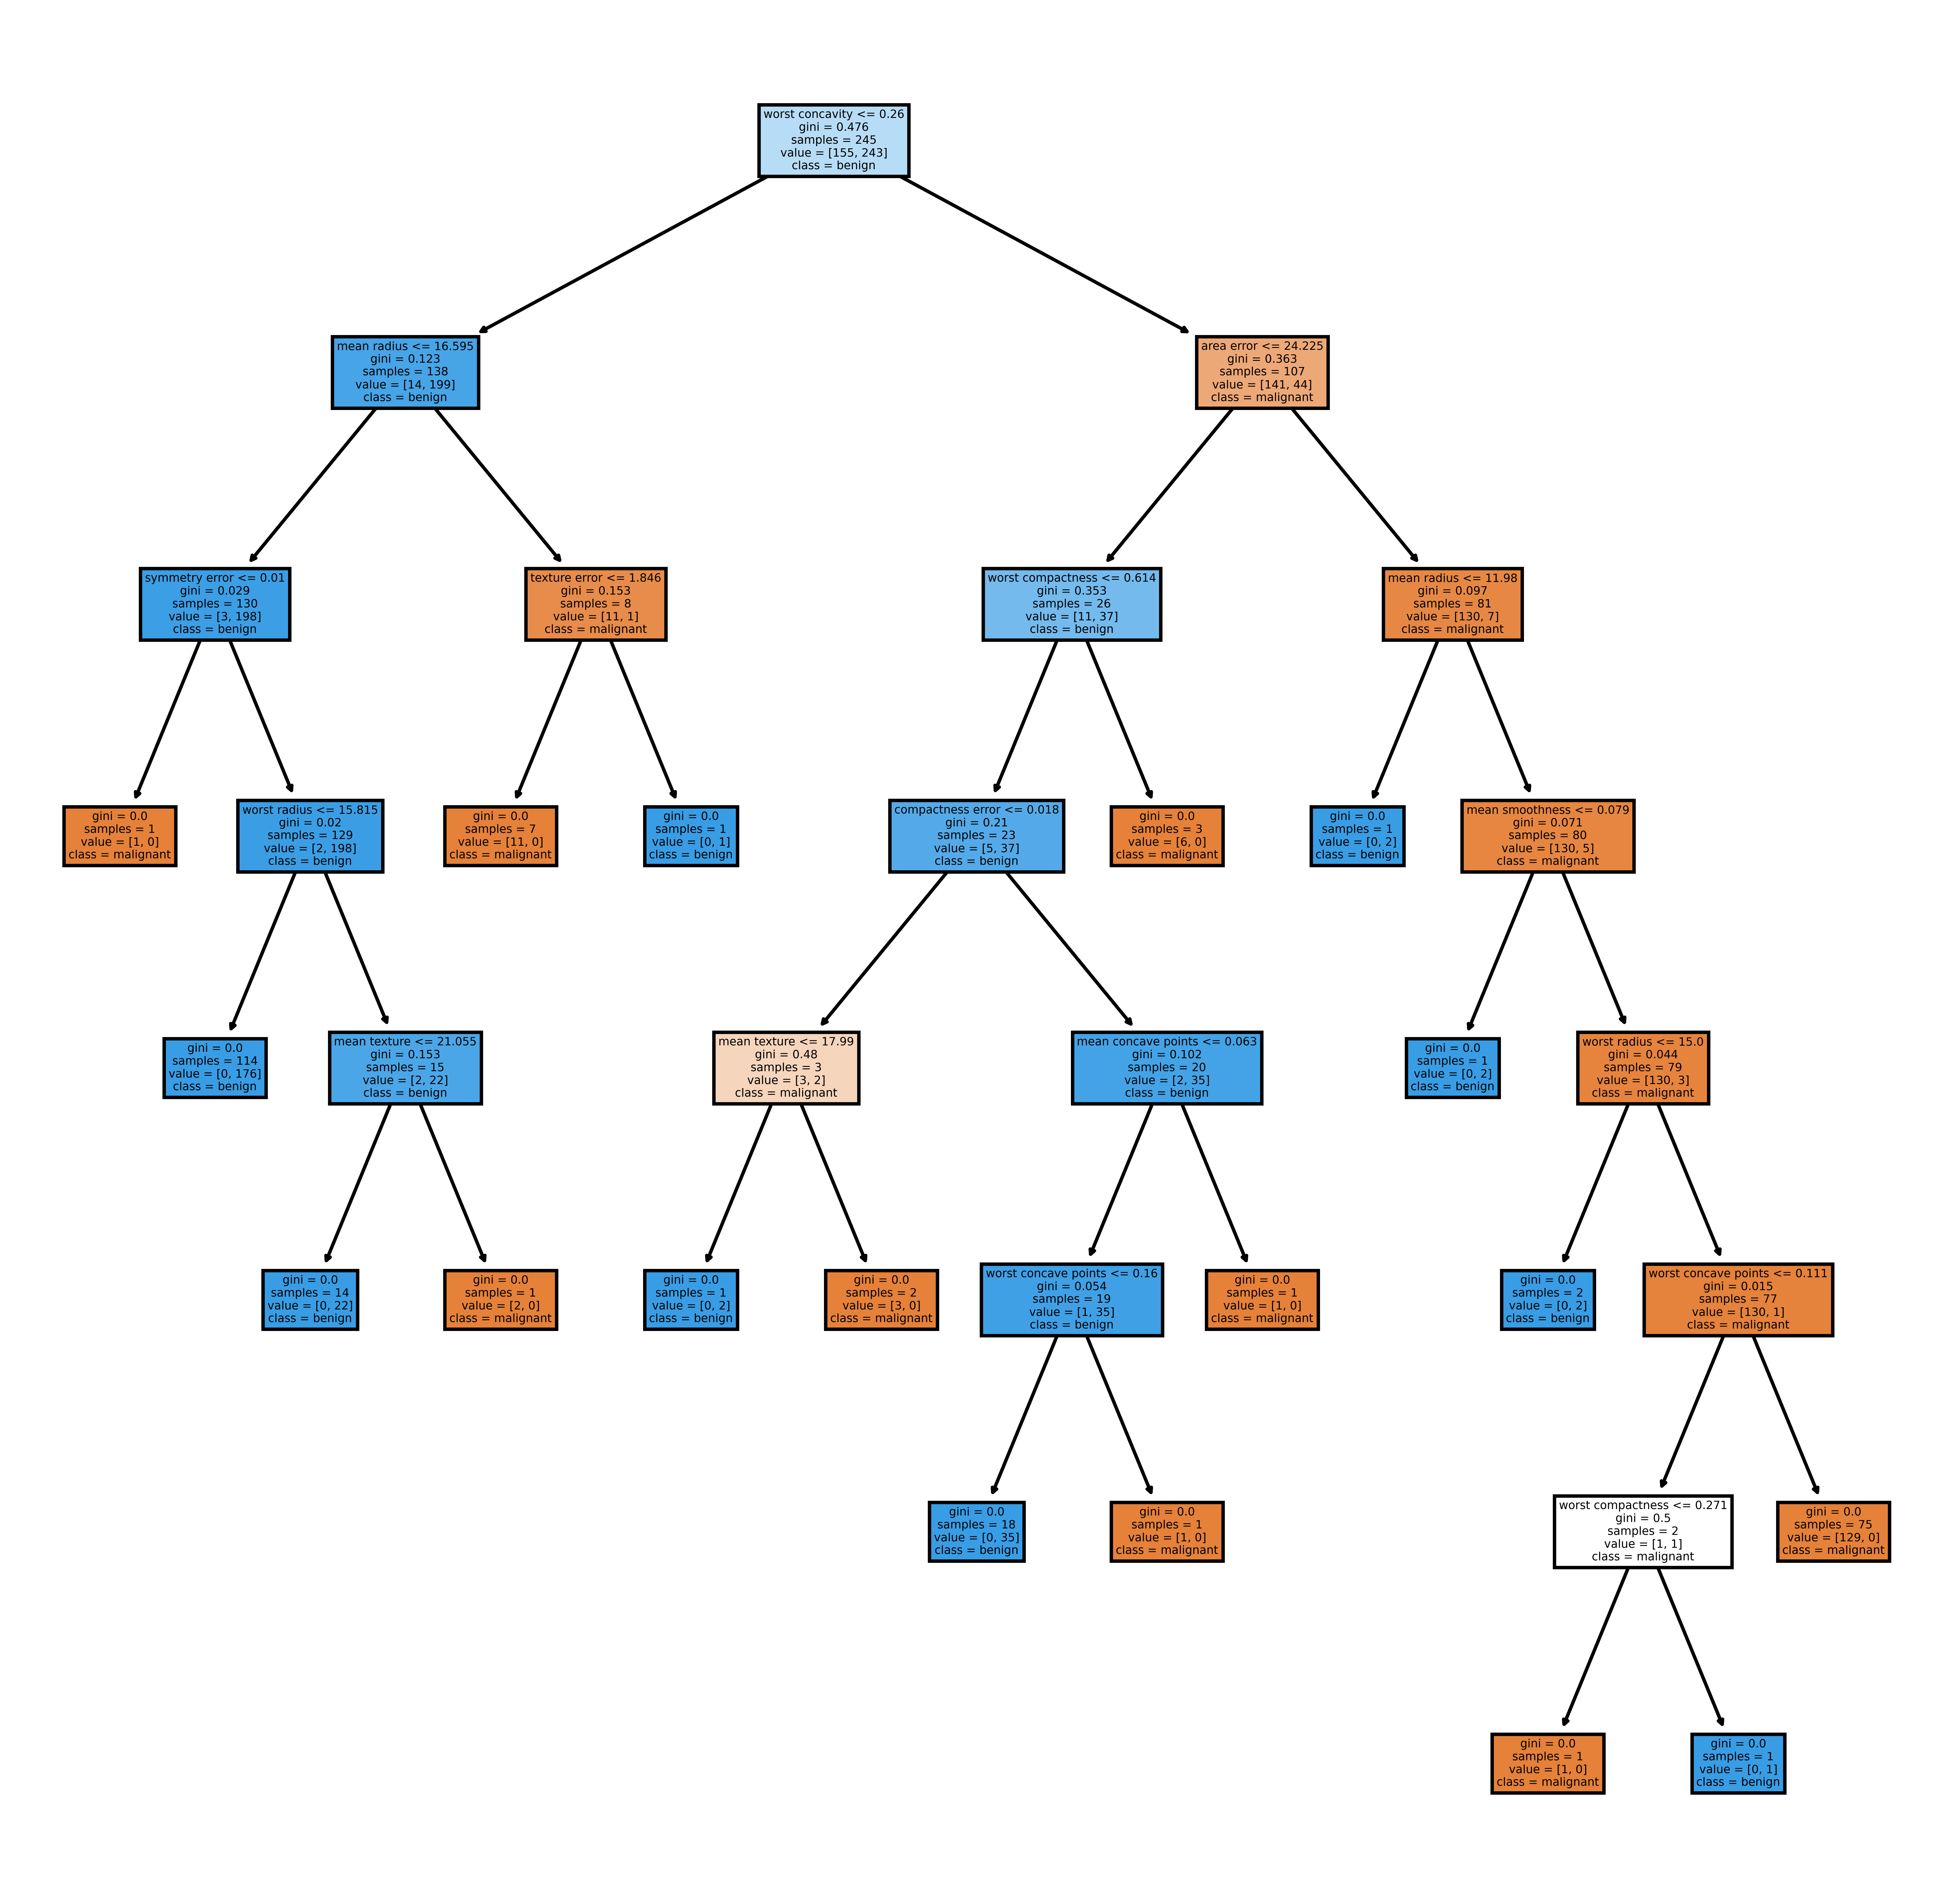

In [118]:
# import tree
from sklearn import tree
fn = cancer.feature_names
cn = cancer.target_names
#cn=['Malignant','Benign']

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=800)
tree.plot_tree(rf.estimators_[0],
               feature_names = fn, 
               class_names= cn,
               filled = True);
fig.savefig('rf_individualtree.png')

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

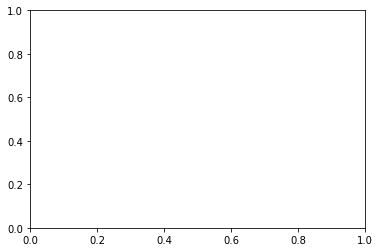

In [122]:
# built in xgboost plot tree
from xgboost import plot_tree
plot_tree(xgb, num_trees=0, rankdir='LR')
plt.savefig('xgboost_individualtree.png')

#### Feature Importance

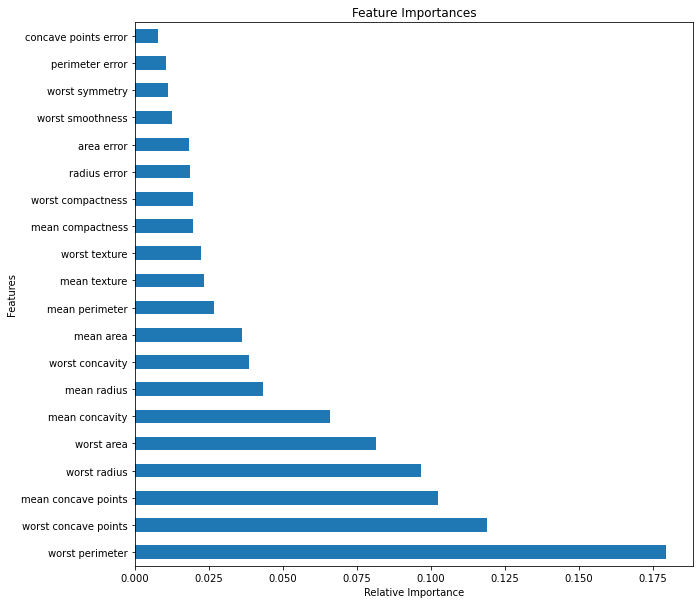

In [138]:
# Feature importance for random forest
feat_importances = pd.Series(rf.feature_importances_, index=cancer.feature_names)
feat_importances.nlargest(20).plot(kind='barh')
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.title('Feature Importances')
plt.show()

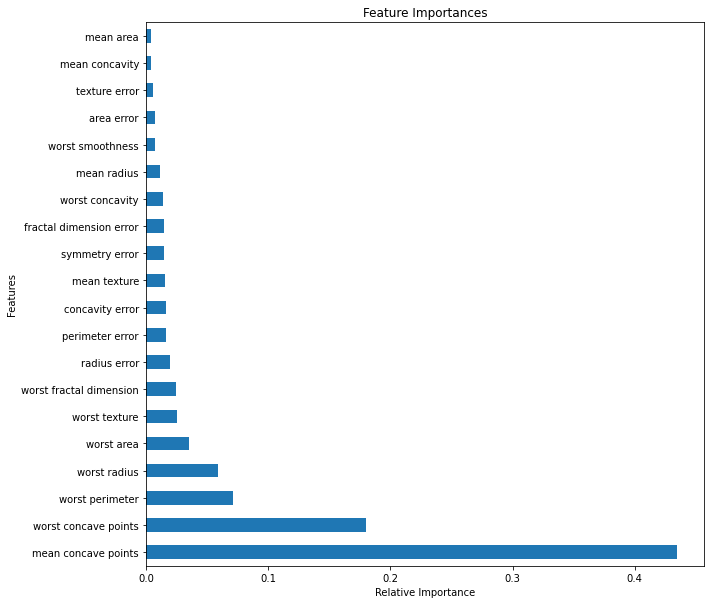

In [139]:
# Feature importance for xgboost
feat_importances = pd.Series(xgb.feature_importances_, index=cancer.feature_names)
feat_importances.nlargest(20).plot(kind='barh')
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.title('Feature Importances')
plt.show()

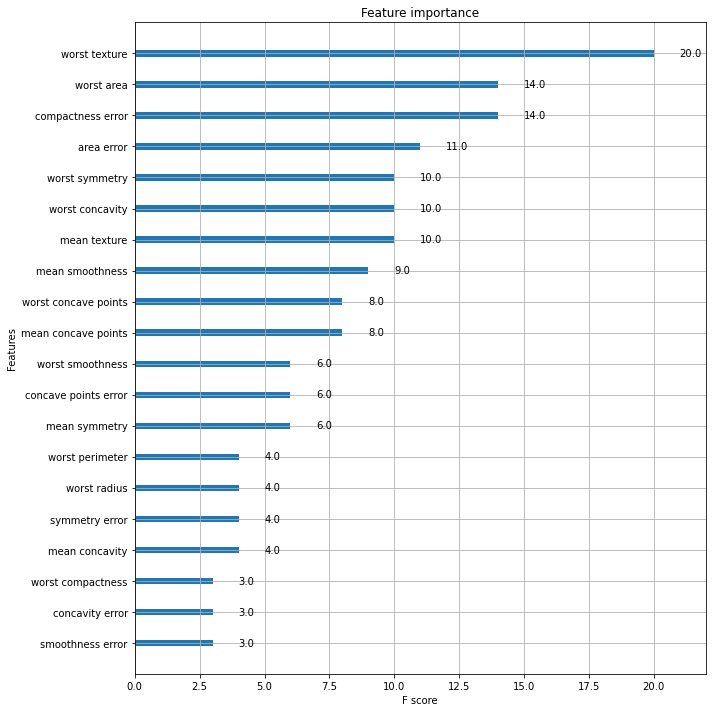

In [136]:
# xgboost built-in feature importance
from xgboost import plot_importance
plot_importance(xgb, max_num_features=20)
plt.savefig('xgboost_featureimportance.png')
plt.tight_layout()
plt.show()
